In [25]:
# ======================================================
# Step 1: Feature Selection & Binary Target Creation
# ======================================================

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ---------------------------
# Project Root (UPDATED)
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML_Final_Project"

DATA_PATH = os.path.join(PROJECT_ROOT, "data")
RAW_PATH = os.path.join(DATA_PATH, "raw")
INTERIM_PATH = os.path.join(DATA_PATH, "interim")

os.makedirs(INTERIM_PATH, exist_ok=True)

# ---------------------------
# Load dataset
# ---------------------------
RAW_DATA_FILE = "Global_Cybersecurity_Threats_2015-2024 (1).csv"
RAW_DATA_PATH = os.path.join(RAW_PATH, RAW_DATA_FILE)

print("📥 Loading dataset...")
df = pd.read_csv(RAW_DATA_PATH)
print(f"✅ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

# ---------------------------
# Clean column names
# ---------------------------
df.columns = df.columns.str.strip()

# ---------------------------
# Select features (NO leakage)
# ---------------------------
selected_features = [
    "Attack Type",
    "Target Industry",
    "Number of Affected Users",
    "Attack Source",
    "Security Vulnerability Type",
    "Incident Resolution Time (in Hours)",
    "Financial Loss (in Million $)"
]

df = df[selected_features].copy()

# ---------------------------
# Train / Test split BEFORE thresholding
# ---------------------------
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)

# ---------------------------
# Binary threshold (TRAIN ONLY)
# ---------------------------
threshold = train_df["Financial Loss (in Million $)"].quantile(0.65)
print(f"🎯 High-Loss Threshold (train only): {threshold:.2f} Million $")

train_df["loss_class_binary"] = (
    train_df["Financial Loss (in Million $)"] > threshold
).astype(int)

test_df["loss_class_binary"] = (
    test_df["Financial Loss (in Million $)"] > threshold
).astype(int)

# ---------------------------
# Target distribution check
# ---------------------------
print("\n📊 Train class distribution:")
print(train_df["loss_class_binary"].value_counts(normalize=True))

print("\n📊 Test class distribution:")
print(test_df["loss_class_binary"].value_counts(normalize=True))

# ---------------------------
# Column types
# ---------------------------
numeric_cols = [
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]

categorical_cols = [
    "Attack Type",
    "Target Industry",
    "Attack Source",
    "Security Vulnerability Type"
]

# ---------------------------
# Basic cleaning (safe)
# ---------------------------
for data in [train_df, test_df]:
    data.drop_duplicates(inplace=True)
    data[numeric_cols] = data[numeric_cols].fillna(
        data[numeric_cols].median()
    )
    for col in categorical_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

# ---------------------------
# Final sanity check
# ---------------------------
print("\n✅ Missing values after cleaning (train):")
print(train_df.isnull().sum())

print("\n✅ Missing values after cleaning (test):")
print(test_df.isnull().sum())

# ---------------------------
# Save outputs
# ---------------------------
train_file = os.path.join(INTERIM_PATH, "train_features_cleaned_binary.csv")
test_file = os.path.join(INTERIM_PATH, "test_features_cleaned_binary.csv")

train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print("\n🎉 Step 1 completed successfully!")
print("📁 Train file:", train_file)
print("📁 Test file:", test_file)


📥 Loading dataset...
✅ Dataset loaded: 3000 rows × 10 columns
🎯 High-Loss Threshold (train only): 65.87 Million $

📊 Train class distribution:
loss_class_binary
0    0.65
1    0.35
Name: proportion, dtype: float64

📊 Test class distribution:
loss_class_binary
0    0.635
1    0.365
Name: proportion, dtype: float64

✅ Missing values after cleaning (train):
Attack Type                            0
Target Industry                        0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Incident Resolution Time (in Hours)    0
Financial Loss (in Million $)          0
loss_class_binary                      0
dtype: int64

✅ Missing values after cleaning (test):
Attack Type                            0
Target Industry                        0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Incident Resolution Time (in Hours)    0
Financial Loss 

In [26]:
# ======================================================
# Step 1.2: Dataset Summary & Exploratory Overview
# ======================================================

import os
import pandas as pd
import numpy as np

# ---------------------------
# Project paths (CONSISTENT)
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML_Final_Project"

DATA_PATH = os.path.join(PROJECT_ROOT, "data")
RAW_PATH = os.path.join(DATA_PATH, "raw")

RAW_DATA_FILE = "Global_Cybersecurity_Threats_2015-2024 (1).csv"
RAW_DATA_PATH = os.path.join(RAW_PATH, RAW_DATA_FILE)

# ---------------------------
# Load dataset
# ---------------------------
df = pd.read_csv(RAW_DATA_PATH)
print("📥 Loaded dataset shape:", df.shape)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

print("\n📌 Columns:")
print(df.columns.tolist())

# ---------------------------
# 1️⃣ Data types & missing values
# ---------------------------
print("\n===== 1️⃣ Data Types & Missing Values =====")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())



📥 Loaded dataset shape: (3000, 10)

📌 Columns:
['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']

===== 1️⃣ Data Types & Missing Values =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        300

In [27]:
# 1.4 Numeric feature summary
# ---------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

print("\n===== 2️⃣ Numeric Features Summary =====")
if numeric_cols:
    print(df[numeric_cols].describe())
else:
    print("⚠️ No numeric columns found")


===== 2️⃣ Numeric Features Summary =====
              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                  

In [28]:
# 1.5 Categorical feature distribution
# ---------------------------
cat_cols = df.select_dtypes(include="object").columns.tolist()

print("\n===== 3️⃣ Categorical Features Summary =====")
for col in cat_cols:
    print(f"\n🔹 Column: {col}")
    print(df[col].value_counts())
    print("Unique values:", df[col].nunique())



===== 3️⃣ Categorical Features Summary =====

🔹 Column: Country
Country
UK           321
Brazil       310
India        308
Japan        305
France       305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64
Unique values: 10

🔹 Column: Attack Type
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64
Unique values: 6

🔹 Column: Target Industry
Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Government            403
Telecommunications    403
Name: count, dtype: int64
Unique values: 7

🔹 Column: Attack Source
Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64
Unique values: 4

🔹 Column: Security Vulnerability Type
Security Vulnera

In [29]:
# 1.6Target variable analysis (if exists)
target_candidates = [
    "Financial Loss (in Million $)",
    "loss_class_binary"
]

for target in target_candidates:
    if target in df.columns:
        print(f"\n===== 4️⃣ Target Variable: {target} =====")
        print(df[target].value_counts())
        if pd.api.types.is_numeric_dtype(df[target]):
            print(df[target].describe())



===== 4️⃣ Target Variable: Financial Loss (in Million $) =====
Financial Loss (in Million $)
17.99    4
39.15    3
52.70    3
91.69    3
21.01    3
        ..
37.89    1
37.94    1
18.11    1
65.16    1
28.14    1
Name: count, Length: 2536, dtype: int64
count    3000.000000
mean       50.492970
std        28.791415
min         0.500000
25%        25.757500
50%        50.795000
75%        75.630000
max        99.990000
Name: Financial Loss (in Million $), dtype: float64


In [30]:
# 1.7Correlation matrix
# ---------------------------
if len(numeric_cols) > 1:
    print("\n===== 5️⃣ Correlation Matrix =====")
    print(df[numeric_cols].corr())


===== 5️⃣ Correlation Matrix =====
                                         Year  Financial Loss (in Million $)  \
Year                                 1.000000                       0.010581   
Financial Loss (in Million $)        0.010581                       1.000000   
Number of Affected Users             0.002317                       0.001787   
Incident Resolution Time (in Hours) -0.004982                      -0.012671   

                                     Number of Affected Users  \
Year                                                 0.002317   
Financial Loss (in Million $)                        0.001787   
Number of Affected Users                             1.000000   
Incident Resolution Time (in Hours)                  0.005893   

                                     Incident Resolution Time (in Hours)  
Year                                                           -0.004982  
Financial Loss (in Million $)                                  -0.012671  
Number of Af

In [31]:
# ======================================================
# step 1.8EDA Setup (Imports, Paths, Styling)
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔥 Make current folder importable
CURRENT_DIR = os.getcwd()
if CURRENT_DIR not in sys.path:
    sys.path.append(CURRENT_DIR)

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML_Final_Project"
DATA_PATH = os.path.join(PROJECT_ROOT, "data")
INTERIM_PATH = os.path.join(DATA_PATH, "interim")
REPORT_PATH = os.path.join(PROJECT_ROOT, "reports", "eda")
os.makedirs(REPORT_PATH, exist_ok=True)

TRAIN_FILE = os.path.join(INTERIM_PATH, "train_features_cleaned_binary.csv")
TEST_FILE  = os.path.join(INTERIM_PATH, "test_features_cleaned_binary.csv")

# ---------------------------
# Plot styling
# ---------------------------
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams.update({"figure.max_open_warning": 0})


In [32]:
# ======================================================
#Load Data & Sanity Checks
# ======================================================

train = pd.read_csv(TRAIN_FILE)
test  = pd.read_csv(TEST_FILE)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTrain target distribution:")
print(train["loss_class_binary"].value_counts())

print("\nTest target distribution:")
print(test["loss_class_binary"].value_counts())

# ---------------------------
# Column definitions
# ---------------------------
numeric_cols = [
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]

categorical_cols = [
    "Attack Type",
    "Target Industry",
    "Attack Source",
    "Security Vulnerability Type"
]

target_col = "loss_class_binary"


Train shape: (2400, 8)
Test shape: (600, 8)

Train target distribution:
loss_class_binary
0    1560
1     840
Name: count, dtype: int64

Test target distribution:
loss_class_binary
0    381
1    219
Name: count, dtype: int64


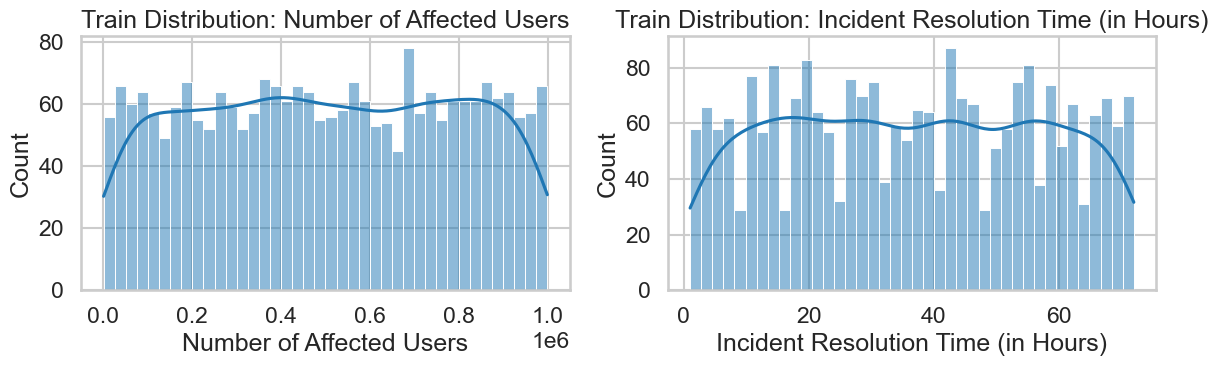

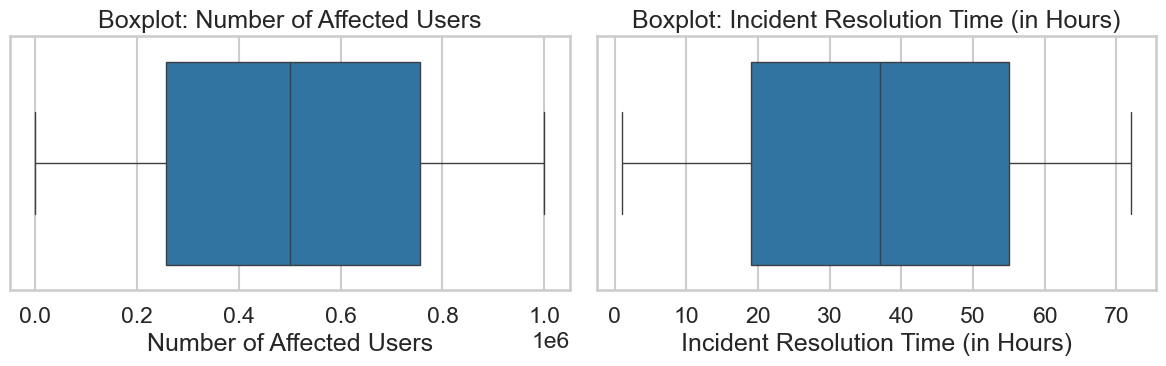

In [33]:
# ======================================================
# Step Numeric Feature Distributions
# ======================================================

# Histograms
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(6 * len(numeric_cols), 4))
axes = [axes] if len(numeric_cols) == 1 else axes

for ax, col in zip(axes, numeric_cols):
    sns.histplot(train[col], bins=40, kde=True, ax=ax)
    ax.set_title(f"Train Distribution: {col}")

plt.tight_layout()
plt.savefig(os.path.join(REPORT_PATH, "numeric_distributions_train.png"), dpi=200)
plt.show()

# Boxplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(6 * len(numeric_cols), 4))
axes = [axes] if len(numeric_cols) == 1 else axes

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train[col], ax=ax)
    ax.set_title(f"Boxplot: {col}")

plt.tight_layout()
plt.savefig(os.path.join(REPORT_PATH, "numeric_boxplots_train.png"), dpi=200)
plt.show()


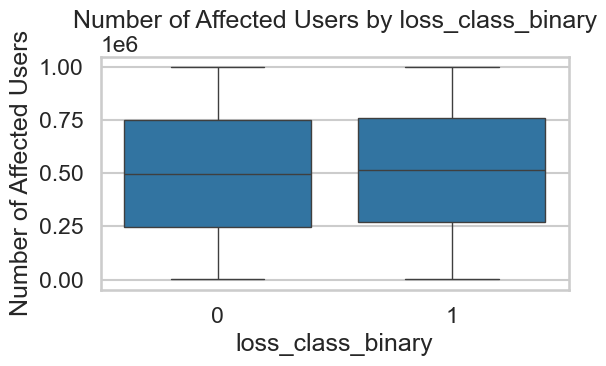

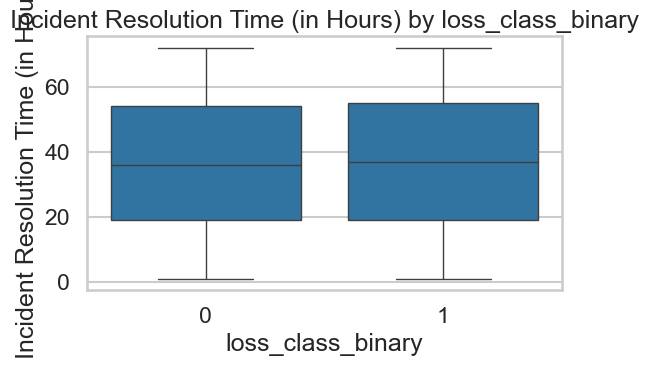

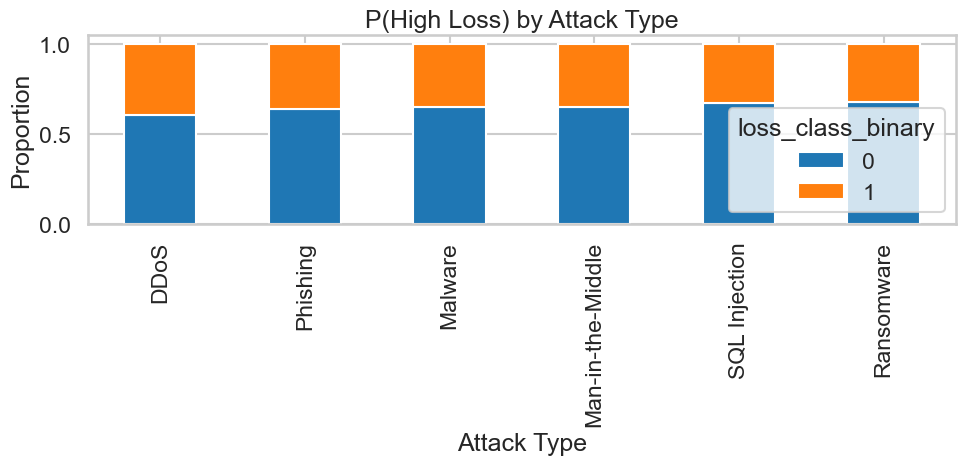

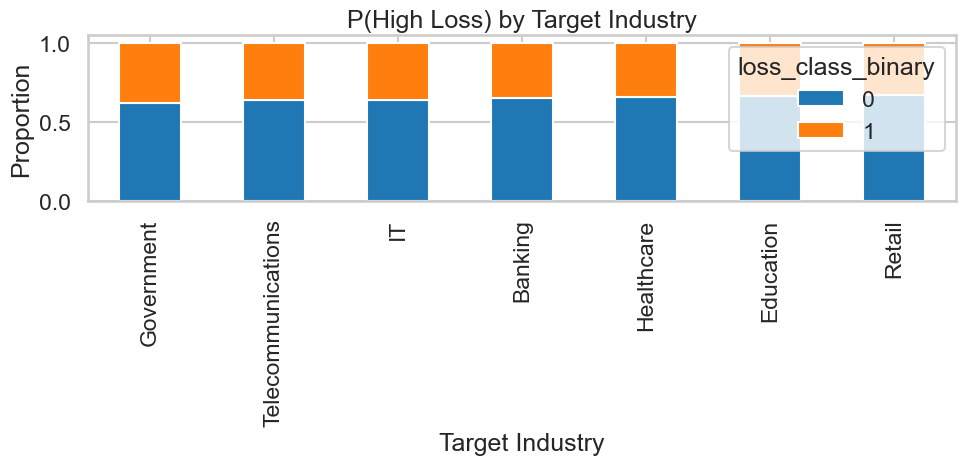

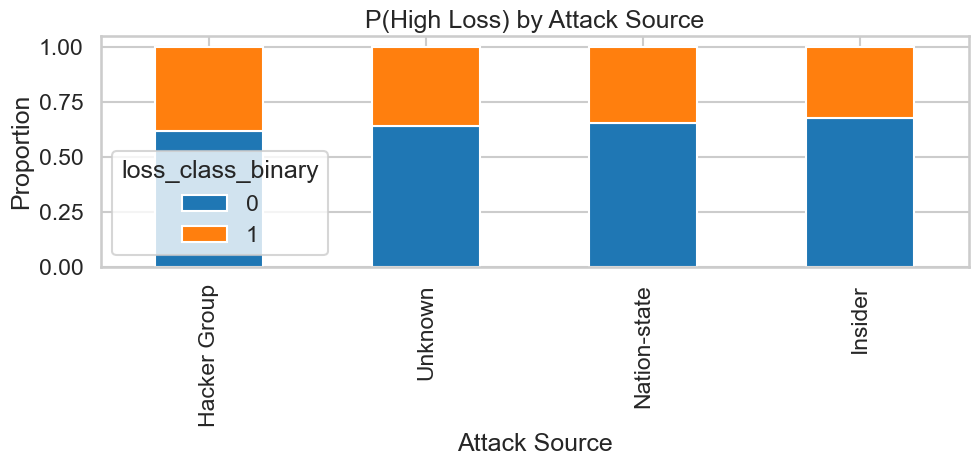

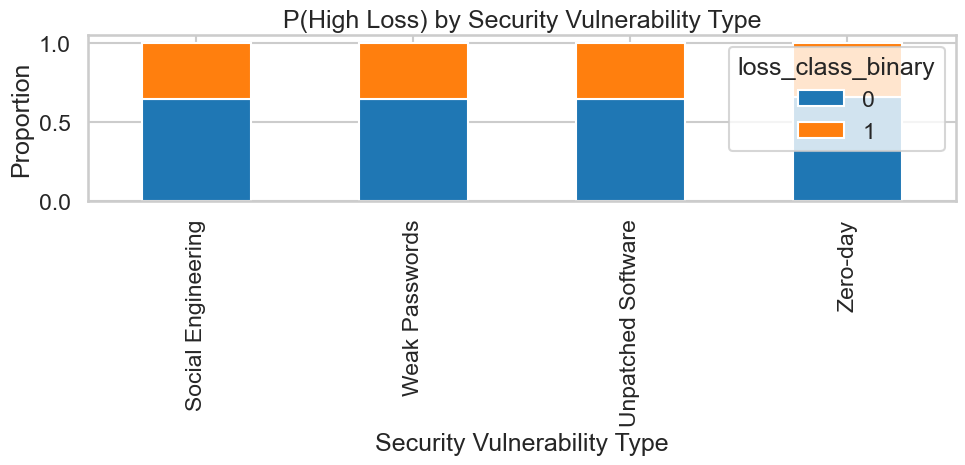

In [34]:
# ======================================================
# Target vs Features
# ======================================================

# Numeric vs Target
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=col, data=train)
    plt.title(f"{col} by {target_col}")
    plt.tight_layout()
    plt.savefig(
        os.path.join(REPORT_PATH, f"target_vs_numeric_{col.replace(' ', '_')}.png"),
        dpi=200
    )
    plt.show()

# Categorical vs Target
for col in categorical_cols:
    ct = pd.crosstab(train[col], train[target_col], normalize="index")
    ct = ct.sort_values(1, ascending=False).head(20)

    ct.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.ylabel("Proportion")
    plt.title(f"P(High Loss) by {col}")
    plt.tight_layout()
    fname = f"target_vs_cat_{col.replace(' ', '_')}.png"
    plt.savefig(os.path.join(REPORT_PATH, fname), dpi=200)
    plt.show()


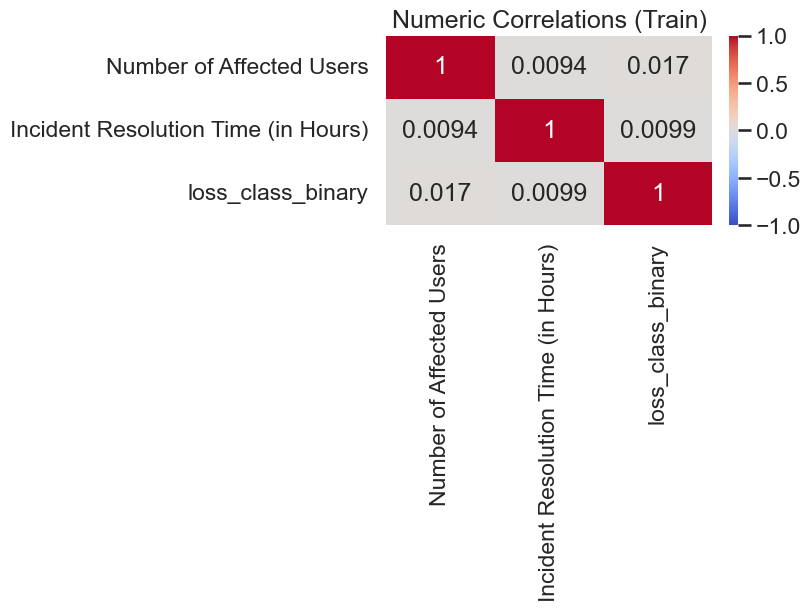

Top 20 features by mutual information:
Target Industry_Telecommunications                0.019939
Target Industry_Retail                            0.016573
Target Industry_Government                        0.016014
Attack Source_Unknown                             0.009617
Attack Source_Insider                             0.004317
Target Industry_Education                         0.003090
Incident Resolution Time (in Hours)               0.002996
Security Vulnerability Type_Unpatched Software    0.002555
Attack Type_SQL Injection                         0.002152
Attack Type_Phishing                              0.001486
Target Industry_Healthcare                        0.000392
Attack Type_Malware                               0.000000
Number of Affected Users                          0.000000
Attack Type_Man-in-the-Middle                     0.000000
Attack Type_Ransomware                            0.000000
Target Industry_IT                                0.000000
Attack Source_Nat

In [36]:
# ======================================================
# Correlations & Feature Ranking
# ======================================================

from sklearn.feature_selection import mutual_info_classif

# Correlation heatmap
plt.figure(figsize=(8, 6), constrained_layout=True)  # Use constrained_layout
corr = train[numeric_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Numeric Correlations (Train)")
plt.savefig(os.path.join(REPORT_PATH, "numeric_correlation_heatmap.png"), dpi=200)
plt.show()

# Mutual Information
def prepare_for_mi(df, numeric_cols, categorical_cols, top_k=30):
    X = df[numeric_cols].copy()
    for col in categorical_cols:
        top = df[col].value_counts().index[:top_k]
        X[col] = df[col].where(df[col].isin(top), "__OTHER__")
    return pd.get_dummies(X, drop_first=True)

X_enc = prepare_for_mi(train, numeric_cols, categorical_cols)
mi = mutual_info_classif(X_enc, train[target_col], random_state=42)

mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False).head(20)
mi_series.to_csv(os.path.join(REPORT_PATH, "feature_mutual_info_top20.csv"))
print("Top 20 features by mutual information:")
print(mi_series)


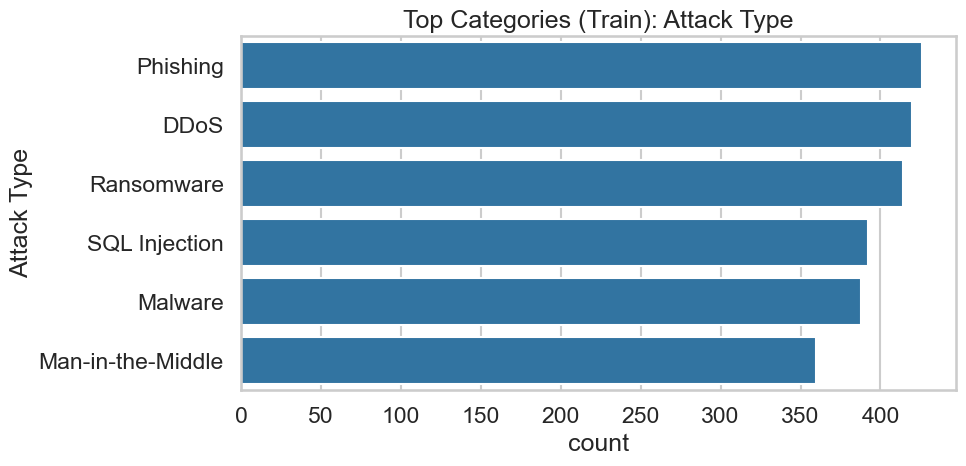

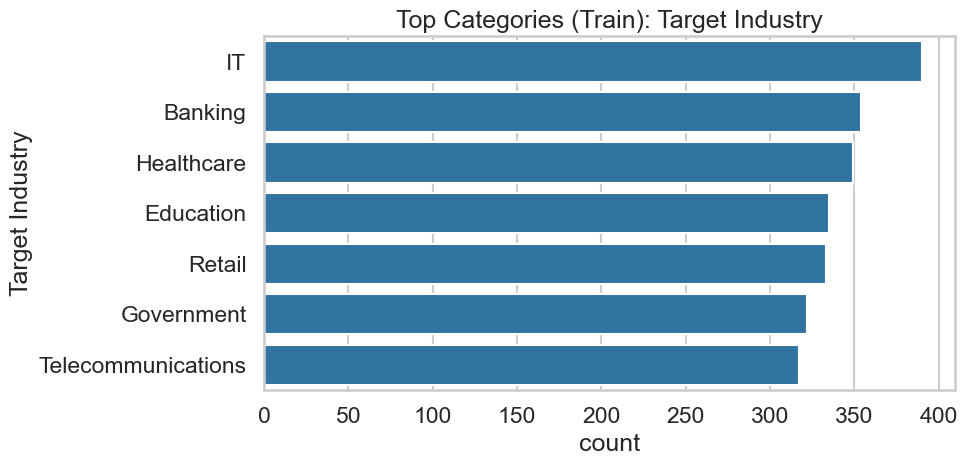

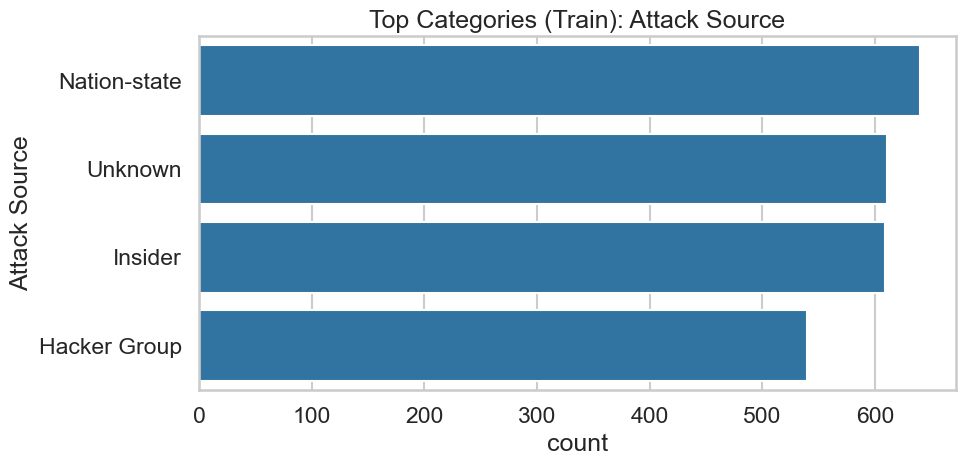

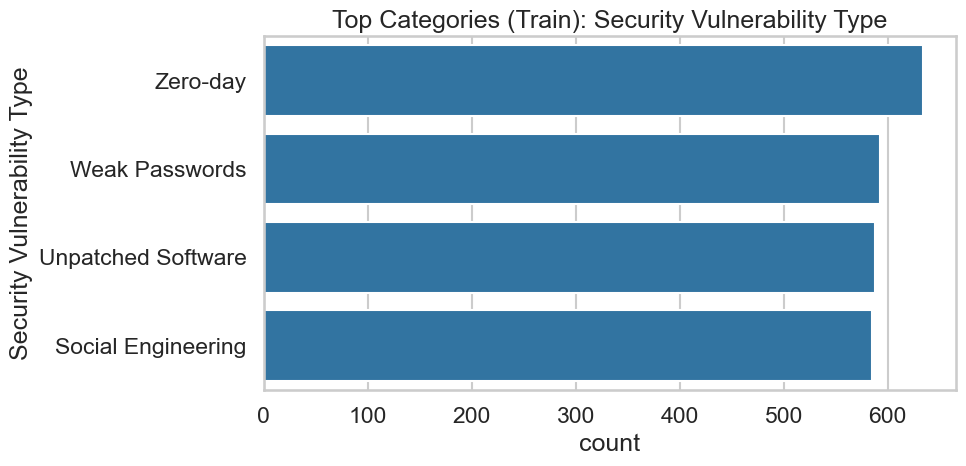

In [37]:
# ======================================================
# Categorical Feature Counts
# ======================================================

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    order = train[col].value_counts().index[:20]
    sns.countplot(data=train, y=col, order=order)
    plt.title(f"Top Categories (Train): {col}")
    plt.tight_layout()
    fname = f"cat_counts_{col.replace(' ', '_')}.png"
    plt.savefig(os.path.join(REPORT_PATH, fname), dpi=200)
    plt.show()
